In [1]:
!pip install squarify

In [2]:
import os
import squarify
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

## **LOAD DATASET AND EXPLORATORY DATA ANALYSIS (EDA)**

In [3]:
df = pd.read_csv('/kaggle/input/market-basket-optimization/Market_Basket_Optimisation.csv', header = None)
print("==============================")
print("SHAPE OF DATAFRAME: "+str(df.shape))
print("==============================")
df.head(10)

SHAPE OF DATAFRAME: (7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("===================")
print("DESCRIPTION OF DATA")
print("===================")
df.describe()

DESCRIPTION OF DATA


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [5]:
len(df[0].unique())

115

WORDCLOUD



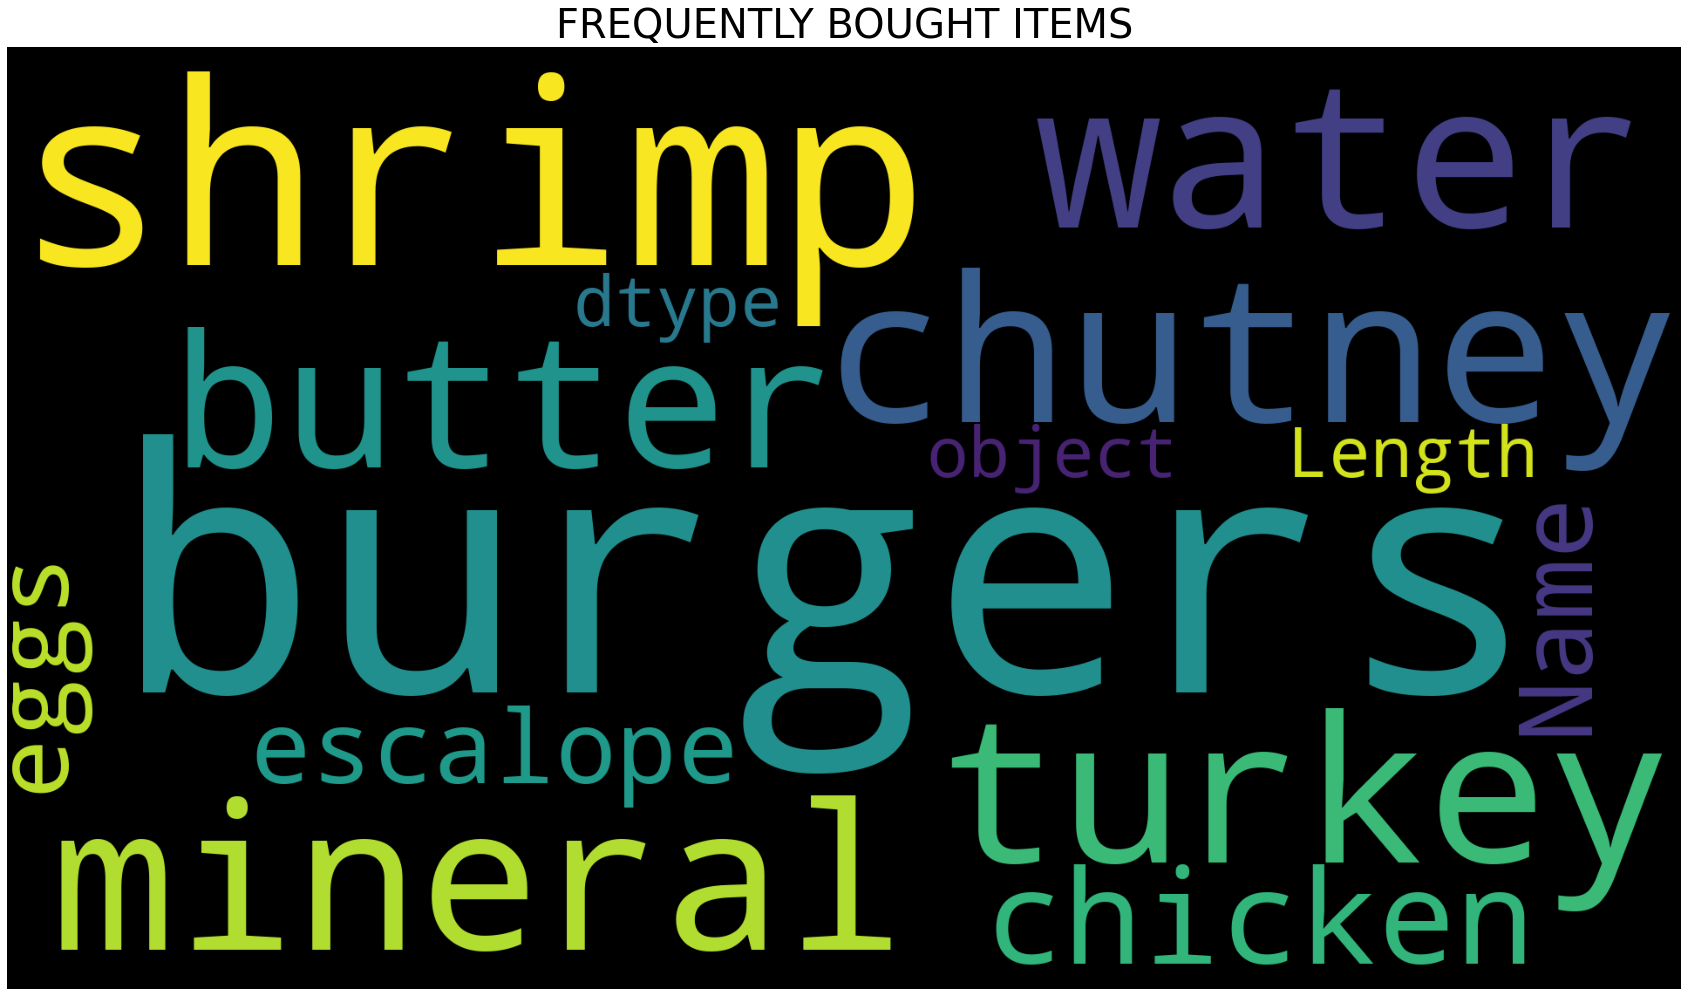

In [6]:
print("=========")
print("WORDCLOUD")
print("=========")
print("")

plt.figure(figsize=(30,30))
wordcloud = WordCloud(background_color = "black",width=1920,height=1080).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("FREQUENTLY BOUGHT ITEMS",fontsize = 40)
plt.show()

FREQUENCY PLOT



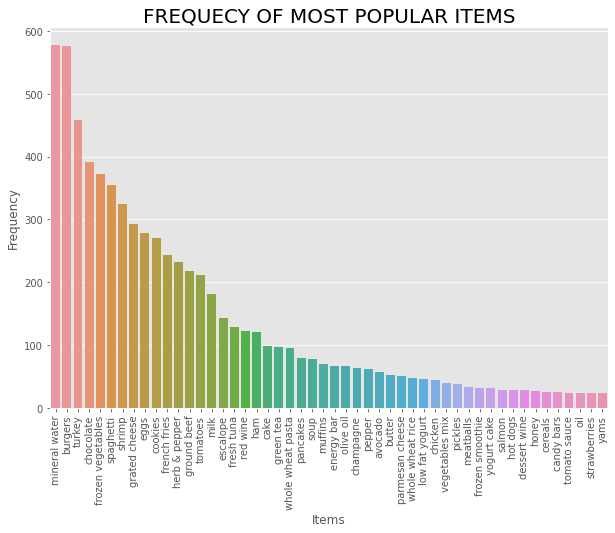

In [7]:
print("==============")
print("FREQUENCY PLOT")
print("==============")
print("")

counts = df[0].value_counts().head(50)
lab = list(counts.index)
val = list(counts.values)
label_index_org = np.array(lab)
label_values_org = np.array(val)

plt.figure(figsize=(10,7))
sns.barplot(label_index_org,label_values_org)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('FREQUECY OF MOST POPULAR ITEMS', fontsize=20)
plt.show()

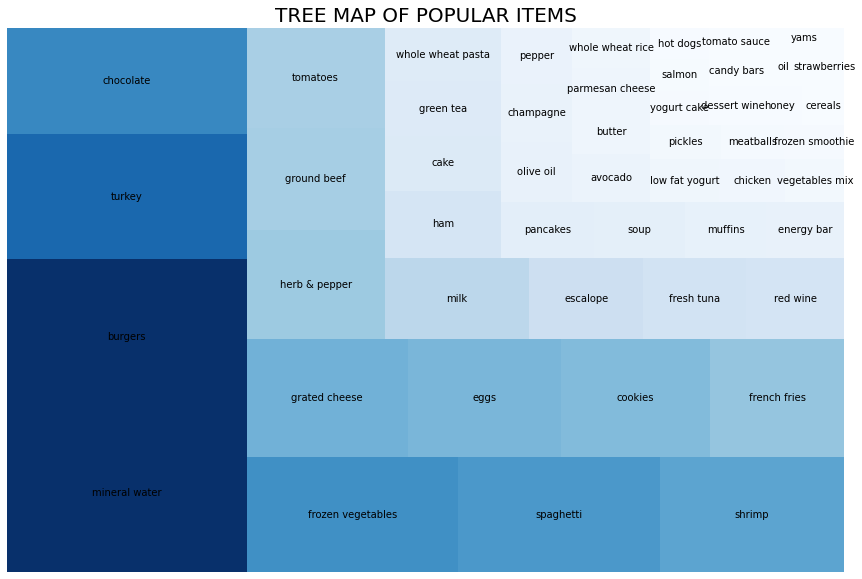

In [8]:
norm = matplotlib.colors.Normalize(vmin=min(val), vmax=max(val))
colors = [matplotlib.cm.Blues(norm(v)) for v in val]
plt.figure(figsize=(15,10))
squarify.plot(sizes=val, label=lab, color=colors)
plt.title('TREE MAP OF POPULAR ITEMS', fontsize=20)
plt.axis('off')
plt.show()

## **DATA PREPROCESSING**

In [9]:
transactions_list = []

for i in range(0, 7501): transactions_list.append([str(df.values[i,j]) for j in range(0, 20)])
transactions_array = np.array(transactions_list)

print("======================================")
print("SHAPE OF TRANSACTION ARRAY: "+str(transactions_array.shape))
print("======================================")

SHAPE OF TRANSACTION ARRAY: (7501, 20)


In [10]:
te = TransactionEncoder()

transactions_data = te.fit_transform(transactions_array)
transactions_data = pd.DataFrame(transactions_data, columns=te.columns_)
transactions_data.replace(np.nan, False)

print("===========================================")
print("SHAPE OF TRANSACTION DATAFRAME: "+str(transactions_data.shape))
print("===========================================")

SHAPE OF TRANSACTION DATAFRAME: (7501, 121)


In [11]:
print("=========================")
print("THE TRANSACTION DATAFRAME")
print("=========================")
print("")
transactions_data.head(10)

THE TRANSACTION DATAFRAME



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
truncated_transactions_data = transactions_data.iloc[:, :50]
truncated_transactions_data.shape

print("====================================================")
print("SHAPE OF TRUNCATED TRANSACTION DATAFRAME: "+str(truncated_transactions_data.shape))
print("====================================================")

SHAPE OF TRUNCATED TRANSACTION DATAFRAME: (7501, 50)


In [13]:
print("====================================")
print("THE TRUNCATED TRANSACTION DATAFRAME:")
print("====================================")
print("")
truncated_transactions_data.head(10)

THE TRUNCATED TRANSACTION DATAFRAME:



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables
0,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## **APRIORI ALGORITHM**

### APRIORI with Truncated Transactions Dataframe

In [14]:
frequent_itemsets_from_truncated_dataframe = apriori(truncated_transactions_data, min_support=0.01, use_colnames=True)
frequent_itemsets_from_truncated_dataframe['Length of Itemset'] = frequent_itemsets_from_truncated_dataframe['itemsets'].apply(lambda x: len(x))

print("==========================================")
print("RULES FROM TRUNCATED TRANSACTION DATAFRAME")
print("==========================================")
print("")
frequent_itemsets_from_truncated_dataframe

RULES FROM TRUNCATED TRANSACTION DATAFRAME



,support,itemsets,Length of Itemset
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
56,0.011065,"(frozen smoothie, eggs)",2
57,0.021730,"(frozen vegetables, eggs)",2
58,0.016398,"(french fries, escalope)",2
59,0.014531,"(french fries, frozen smoothie)",2


In [15]:
print("========================================================================")
print("TOTAL NUMBER OF RULES GENERATED FROM TRUNCATED TRANSACTION DATAFRAME: " + str(frequent_itemsets_from_truncated_dataframe.shape[0]))
print("========================================================================")

TOTAL NUMBER OF RULES GENERATED FROM TRUNCATED TRANSACTION DATAFRAME: 61


### APRIORI with Complete Transactions Dataframe

In [16]:
frequent_itemsets_from_complete_dataframe = apriori(transactions_data, min_support=0.01, use_colnames=True)
frequent_itemsets_from_complete_dataframe['Length of Itemset'] = frequent_itemsets_from_complete_dataframe['itemsets'].apply(lambda x: len(x))

print("=====================================================")
print("FREQUENT ITEMSETS FROM COMPLETE TRANSACTION DATAFRAME")
print("=====================================================")
print("")
frequent_itemsets_from_complete_dataframe

FREQUENT ITEMSETS FROM COMPLETE TRANSACTION DATAFRAME



,support,itemsets,Length of Itemset
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
510,0.011065,"(nan, milk, mineral water, ground beef)",4
511,0.017064,"(nan, mineral water, spaghetti, ground beef)",4
512,0.015731,"(nan, milk, mineral water, spaghetti)",4
513,0.010265,"(nan, mineral water, olive oil, spaghetti)",4


In [17]:
print("====================================================================================")
print("TOTAL NUMBER OF FREQUENT ITEMSETS GENERATED FROM COMPLETE TRANSACTION DATAFRAME: " + str(frequent_itemsets_from_complete_dataframe.shape[0]))
print("====================================================================================")

TOTAL NUMBER OF FREQUENT ITEMSETS GENERATED FROM COMPLETE TRANSACTION DATAFRAME: 515


## **FILTERATION OF FREQUENT ITEMSETS**

### Frequent Itemsets With ONE Item

In [18]:
frequent_itemsets_with_len_1 = frequent_itemsets_from_complete_dataframe[frequent_itemsets_from_complete_dataframe['Length of Itemset'] == 1]

print("===============================")
print("FREQUENT ITEMSETS WITH ONE ITEM")
print("===============================")
print("")
frequent_itemsets_with_len_1

FREQUENT ITEMSETS WITH ONE ITEM



,support,itemsets,Length of Itemset
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
71,0.016531,(white wine),1
72,0.029463,(whole wheat pasta),1
73,0.058526,(whole wheat rice),1
74,0.011465,(yams),1


In [19]:
print("===================================================")
print("TOTAL NUMBER OF FREQUENT ITEMSETS WITH ONE ITEM: " + str(frequent_itemsets_with_len_1.shape[0]))
print("===================================================")

TOTAL NUMBER OF FREQUENT ITEMSETS WITH ONE ITEM: 76


### Frequent Itemsets With TWO Items

In [20]:
frequent_itemsets_with_len_2 = frequent_itemsets_from_complete_dataframe[frequent_itemsets_from_complete_dataframe['Length of Itemset'] == 2]

print("================================")
print("FREQUENT ITEMSETS WITH TWO ITEMS")
print("================================")
print("")
frequent_itemsets_with_len_2

FREQUENT ITEMSETS WITH TWO ITEMS



,support,itemsets,Length of Itemset
76,0.020264,"(nan, almonds)",2
77,0.011598,"(avocado, mineral water)",2
78,0.033196,"(nan, avocado)",2
79,0.010799,"(nan, barbecue sauce)",2
80,0.014265,"(nan, black tea)",2
...,...,...,...
311,0.011199,"(tomatoes, shrimp)",2
312,0.014265,"(soup, spaghetti)",2
313,0.020931,"(tomatoes, spaghetti)",2
314,0.016531,"(turkey, spaghetti)",2


In [21]:
print("=====================================================")
print("TOTAL NUMBER OF FREQUENT ITEMSETS WITH TWO ITEMS: " + str(frequent_itemsets_with_len_2.shape[0]))
print("=====================================================")

TOTAL NUMBER OF FREQUENT ITEMSETS WITH TWO ITEMS: 240


### Frequent Itemsets With THREE Items

In [22]:
frequent_itemsets_with_len_3 = frequent_itemsets_from_complete_dataframe[frequent_itemsets_from_complete_dataframe['Length of Itemset'] == 3]

print("==================================")
print("FREQUENT ITEMSETS WITH THREE ITEMS")
print("==================================")
print("")
frequent_itemsets_with_len_3

FREQUENT ITEMSETS WITH THREE ITEMS



,support,itemsets,Length of Itemset
316,0.011465,"(nan, avocado, mineral water)",3
317,0.011465,"(nan, burgers, cake)",3
318,0.017064,"(nan, chocolate, burgers)",3
319,0.028796,"(nan, burgers, eggs)",3
320,0.021997,"(nan, french fries, burgers)",3
...,...,...,...
493,0.011199,"(nan, tomatoes, shrimp)",3
494,0.014265,"(nan, soup, spaghetti)",3
495,0.020931,"(nan, tomatoes, spaghetti)",3
496,0.016531,"(nan, turkey, spaghetti)",3


In [23]:
print("=======================================================")
print("TOTAL NUMBER OF FREQUENT ITEMSETS WITH THREE ITEMS: " + str(frequent_itemsets_with_len_3.shape[0]))
print("=======================================================")

TOTAL NUMBER OF FREQUENT ITEMSETS WITH THREE ITEMS: 182


### Frequent Itemsets With FOUR Items

In [24]:
frequent_itemsets_with_len_4 = frequent_itemsets_from_complete_dataframe[frequent_itemsets_from_complete_dataframe['Length of Itemset'] == 4]

print("=================================")
print("FREQUENT ITEMSETS WITH FOUR ITEMS")
print("=================================")
print("")
frequent_itemsets_with_len_4

FREQUENT ITEMSETS WITH FOUR ITEMS



,support,itemsets,Length of Itemset
498,0.013465,"(nan, mineral water, chocolate, eggs)",4
499,0.010532,"(nan, chocolate, spaghetti, eggs)",4
500,0.010932,"(nan, mineral water, chocolate, ground beef)",4
501,0.013998,"(nan, milk, mineral water, chocolate)",4
502,0.010932,"(nan, milk, chocolate, spaghetti)",4
503,0.015865,"(nan, mineral water, chocolate, spaghetti)",4
504,0.010132,"(nan, ground beef, mineral water, eggs)",4
505,0.013065,"(nan, milk, mineral water, eggs)",4
506,0.014265,"(nan, mineral water, spaghetti, eggs)",4
507,0.010132,"(nan, french fries, mineral water, spaghetti)",4


In [25]:
print("======================================================")
print("TOTAL NUMBER OF FREQUENT ITEMSETS WITH THREE ITEMS: " + str(frequent_itemsets_with_len_4.shape[0]))
print("======================================================")

TOTAL NUMBER OF FREQUENT ITEMSETS WITH THREE ITEMS: 17


## **GENERATION OF ASSOCIATION RULES**

In [26]:
rules_df = association_rules(frequent_itemsets_from_complete_dataframe, metric="lift", min_threshold=1.2)
rules_df["Antecedents_Length"] = rules_df["antecedents"].apply(lambda x: len(x))
rules_df["Consequents_Length"] = rules_df["consequents"].apply(lambda x: len(x))
print("=================")
print("ASSOCIATION RULES")
print("=================")
print("")
rules_df.sort_values("lift",ascending=False)

ASSOCIATION RULES



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents_Length,Consequents_Length
634,"(nan, herb & pepper)",(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,2,1
158,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
636,(herb & pepper),"(nan, ground beef)",0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,2
159,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
637,(ground beef),"(nan, herb & pepper)",0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,2
...,...,...,...,...,...,...,...,...,...,...,...
109,(escalope),(french fries),0.079323,0.170911,0.016398,0.206723,1.209537,0.002841,1.045145,1,1
622,"(nan, shrimp)",(green tea),0.071324,0.132116,0.011332,0.158879,1.202571,0.001909,1.031818,2,1
625,(green tea),"(nan, shrimp)",0.132116,0.071324,0.011332,0.085772,1.202571,0.001909,1.015804,1,2
623,"(nan, green tea)",(shrimp),0.131982,0.071457,0.011332,0.085859,1.201540,0.001901,1.015754,2,1


## **FIND FREQUENTLY BOUGHT TOGETHER ITEMS**

In [27]:
def findFrequentlyBoughtTogether(items):
    for itemset in frequent_itemsets_from_complete_dataframe['itemsets']:
        item_lis = list(itemset)
        if any(item in items for item in item_lis):
            print(item_lis)

In [28]:
def AprioriDriver():
    basket = []
    print("")
    basket_length = int(input("ENTER NUMBER OF ITEMS ALREADY IN BASKET: "))
    print("")
    print("ENTER THE NAME OF THE ITEMS IN THE BASKET: ")
    for i in range(0, basket_length):
        temp = input().lower()
        basket.append(temp)
    print("")
    print("===================================================")
    print("FREQUENTLY BOUGHT TOGETHER WITH ITEMS IN THE BASKET")
    print("===================================================")
    print("")
    findFrequentlyBoughtTogether(basket)

In [29]:
def main():
    
    while(1):
        
        print("")
        print("")
        
        STATUS = input("ENTER: M -> Mining || Q -> QUIT : ").upper()
        
        if STATUS == 'M':
            AprioriDriver()
        
        elif STATUS == 'Q':
            print("")
            print("")
            print("=======================")
            print("---Execution Stopped---")
            print("=======================")
            break
        
        else:
            print("=======================================")
            print("---ERROR: INVALID Keystroke is given---")
            print("=======================================")
            break

In [30]:
'''
SAMPLE INPUTS

M
1
milk

M
2
shrimp
tomatoes

Q
'''


if __name__=="__main__":
    main()

ENTER: M -> Mining || Q -> QUIT :  M


ENTER NUMBER OF ITEMS ALREADY IN BASKET:  1



ENTER THE NAME OF THE ITEMS IN THE BASKET: 


 milk



FREQUENTLY BOUGHT TOGETHER WITH ITEMS IN THE BASKET

['milk']
['milk', 'burgers']
['milk', 'cake']
['milk', 'chicken']
['milk', 'chocolate']
['milk', 'cooking oil']
['milk', 'eggs']
['french fries', 'milk']
['milk', 'frozen smoothie']
['milk', 'frozen vegetables']
['milk', 'green tea']
['milk', 'ground beef']
['milk', 'low fat yogurt']
['milk', 'mineral water']
['nan', 'milk']
['milk', 'olive oil']
['pancakes', 'milk']
['milk', 'shrimp']
['soup', 'milk']
['milk', 'spaghetti']
['tomatoes', 'milk']
['milk', 'turkey']
['milk', 'whole wheat rice']
['nan', 'milk', 'burgers']
['nan', 'milk', 'cake']
['nan', 'milk', 'chicken']
['milk', 'mineral water', 'chocolate']
['nan', 'milk', 'chocolate']
['milk', 'chocolate', 'spaghetti']
['nan', 'milk', 'cooking oil']
['milk', 'mineral water', 'eggs']
['nan', 'milk', 'eggs']
['nan', 'french fries', 'milk']
['nan', 'milk', 'frozen smoothie']
['milk', 'mineral water', 'frozen vegetables']
['nan', 'milk', 'frozen vegetables']
['nan', 'milk', 'green tea']

ENTER: M -> Mining || Q -> QUIT :  M


ENTER NUMBER OF ITEMS ALREADY IN BASKET:  2



ENTER THE NAME OF THE ITEMS IN THE BASKET: 


 shrimp
 tomatoes



FREQUENTLY BOUGHT TOGETHER WITH ITEMS IN THE BASKET

['shrimp']
['tomatoes']
['chocolate', 'shrimp']
['tomatoes', 'chocolate']
['shrimp', 'eggs']
['tomatoes', 'eggs']
['french fries', 'tomatoes']
['shrimp', 'frozen vegetables']
['tomatoes', 'frozen vegetables']
['shrimp', 'green tea']
['tomatoes', 'green tea']
['ground beef', 'shrimp']
['tomatoes', 'ground beef']
['milk', 'shrimp']
['tomatoes', 'milk']
['mineral water', 'shrimp']
['tomatoes', 'mineral water']
['nan', 'shrimp']
['nan', 'tomatoes']
['pancakes', 'shrimp']
['shrimp', 'spaghetti']
['tomatoes', 'shrimp']
['tomatoes', 'spaghetti']
['nan', 'chocolate', 'shrimp']
['nan', 'tomatoes', 'chocolate']
['nan', 'shrimp', 'eggs']
['nan', 'tomatoes', 'eggs']
['nan', 'tomatoes', 'french fries']
['nan', 'shrimp', 'frozen vegetables']
['nan', 'tomatoes', 'frozen vegetables']
['nan', 'shrimp', 'green tea']
['nan', 'tomatoes', 'green tea']
['nan', 'ground beef', 'shrimp']
['nan', 'tomatoes', 'ground beef']
['nan', 'milk', 'shrimp']
['nan', '

ENTER: M -> Mining || Q -> QUIT :  q




---Execution Stopped---
